![title image](figures/kickstarter_project_title.png)

# 1. Business Understanding
Ask relevant questions and define objectives for the problem that needs to be tackled

## 1.1 About Kickstarter
In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative.

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project. A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not.

The aim of this project is:
- to construct such a model 
- and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

## 1.2 Final Deliverables
- Slide deck [PDF](pdf/nf-Project02_KICKSTARTER_Project_Presentation.pdf) pushed to GitHub designed for non-technical stakeholders outlining findings and recommendations, as well as future work (10min presentation). 
- Jupyter notebook following PEP8 designed for data science / technical audience. 

## 1.3 Things to think about
- Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
- What would be right performance metric: Precision, recall, accuracy, F1 score, or something else? (Check TPR?)
- Check for data imbalance

## 1.4 Project Presentation
The [Project Presentation](pdf/nf-Project02_KICKSTARTER_Project_Presentation.pdf) begins on 08.10.2020 at 11:00h.


## 1.5 Business Case / Key Questions
- Can a model (based on given or created project parameters) be created that predicts the success of a project on Kickstarter, greater than the baseline rate? Building such a model is the main task!
- Which factors have the greatest influence on a successful project? A list of recommendations for for project creators sould be another outcome of this work!


## 1.6 Performance Metric
The main aim of this project is to predict wether or not a Kickstarer campaign is successful (y=1) or not (y=0). As with all classification predictions, the model of concern might not be perfectly accurate. The model might predict a campaign as successful while the campaign actually failed (FP).  Or, an actual successful campaign is predicted as unsuccessful (FN). To compare different models among each other but also to describe the performance of a specific model to a shareholder, a Performance Metric needs to be chosen. 

This project focuses on the **F1-Score** as target metric. Reasoning: 

- F1-Score combines both precision (PPV ) and  recall (TPR, or sensitivity). Unlike PPV and TPR separately, it takes both false positives and false negatives into account simultaneously.
- In the context of success prediction, both wrongly predicted failing (False Negatives; prediction: failed, actual: success) and wrongly predicted succes (False Postive; prediction: success, actual: failed) are equally important. This is different e.g., for cancer predictions, where a low FN (prediction: no-cancer, actual: caner) rate is of utmost importance. 

The F1-Score is the *harmonic mean* of precision and recall. As a result, a prediction will only get a high F1-Score if both recall and precision are high. The F1-Score is calculated as followed: *F1 = 2 · (PPV · TPR) / (PPV + TPR)*

ROC-AUC was considered as alternative performance metric. The idea of using ROC-AUIC was discarded due to the easier interpretation of the F1-Score.  

# 2. Dataset Details

## 2.1 Origin of the dataset
Due to the fact that the given data sets (Kickstarter000.csv to Kickstarter055.csv) have the same structure (features and column-format, only 'country_displayable_name'- a reasonable feature btw. - is missing) as the data to be found on https://webrobots.io/kickstarter-datasets/ it can be assumed that this is also their source.  

The data was crawled by the company [WebRobots](https://webrobots.io/) ('We provide B2B web crawling and scraping services') directly from the [Kickstarter-Website](https://www.kickstarter.com/).

Current data (crawled within the timeframe 2014-04-22 to 2020-08-13) can be found there.  
All of the datasets contains snapshots of all kickstarter-projects (from the beginning in 2009) in the status at the crawl-date.

Notes from WebRobots:  
- From December 2015 we modified the collection approach to go through all sub-categories instead of only top level categories. This yields more results in the datasets, but possible **duplication where projects are listed in multiple categories**.
- From March 2016 we run this data crawl once a month. Datasets are available from scrape dates.
- We receive many question about timestamp format used in this dataset. It is unix-time. (Unix timestamps correspond to the number of seconds that have passed since 01.01.1970.)




## 2.2 Feature Glossary
**Prediction relevant features:**
- **state** - Indicates the status of the project. Categorical values: successful, failed, live, cancelled and suspended.  
THIS IS OUR TARGET. But we will only look after finalized projects with state successful or failed.
- **id** - Project-Id (?)
- **profile** - Contains the project-id and indicates the status (active/inactive).
- **category** - Contains (among other stuff) main and subcategory.
- **source_url** - URL of the corresponding category/subcategory.
- **country** - Country of origin of the project.
- **creator** - Data about the person who created the project.
- **backers_count** - Number of supporters who are invested (at crawling-date).
- **staff_pick** - True/false-values. Indicates that this project is highlighted by the staff. Promoted by email-newsletter and highlighted spots around the site.
- **launched_at** - Launch date of the project (UNIX Format).
- **deadline** - Deadline of the project. At this point the decision is made wheater the project gets realized (goal is reached) or not.
- **currency** - Currency of the project (e.g. USD, EUR)
- **goal** - Target-amount in project-currency.
- **static_usd_rate** - Static currency conversion rate.
- **usd_pledged** - Current pledged amount of USD (at crawling date, converted from "pledged" via "static_usd_rate", float).

**Features to be derived from this:**

*HIGH PRIO*
- **success** - Done
- **usd_goal** - Done
- **category** - Done
- **subcategory** - Done
- **total_category** - Done 
- **duration_days** - Days the campaign was active (difference of "launched_at" and "deadline")
- **launch_hour'** - Done
- **launch_day'** - Done
- **launch_month'** - Done
- **launch_year'** - Done
- **deadline_hour'** - Done
- **deadline_day'** - Done
- **deadline_month'** - Done
- **deadline_year'** - Done
- **project_id** - Done

*LOW PRIO*
- **creator_projects** - Amount of projects of the creator 
- **success_factor** - usd_pledged/usd_goal


**potential Feature Engineering**
- **avg. backing per sub_cat** - for each observation --> Done


**Maybe useful:**
- **location** - Location of the project
- **blurb** - A short description of the offered product/service written for promotional purposes

**Maybe useful Features to be derived from this::**
- **blurb_lenghts** - ...


**For our prediction not further considered:**
- **converted_pledged_amount** - Current pledged amount of USD (at crawling date, converted from "pledged" via "static_usd_rate", rounded).
- **created_at** - Date when Project was created (UNIX Format).
- **currency_symbol** - Symbol of the currency.
- **currency_trailing_code** - Defines whether the currency codes are always shown after the amounte locale.
- **current_currency** - Unknown (!) current currency. Not important, because we only look after converted USD.
- **disable_communication** - True when the campaign is suspend (?)
- **friends** - Many NaN and a few empty lists.
- **fx_rate** - Used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars. Can be dropped ('static_usd_rate'  always converts to dollars).
- **is_backing** - Many empty entries and a few false-values.
- **is_starrable** - true/false-values. Unknown (!)
- **is_starred** - Many empty entries and a few false-values.
- **name** - Name of the project.
- **permissions** - Many NaN and a few empty lists.
- **photo** - Some information regarding the project-photos.
- **pledged** - Unconverted pledged amount as float.
- **slug** - Creator-selected keyword id of the project.
- **spotlight** - True/false-values. A possible feature that allows every successfully funded Kickstarter project to tell its story from beginning to end.
- **state_changed_at** - State-changed-date of the project (UNIX Format).
- **urls** - Link directly to the project on kickstarter.
- **usd_type** - domestic, international or NaN. Not important, because we only look after converted USD.

## 2.3 Dataset Description
- **df_rawdata** - Originally imported dataset
- **df** - Main working dataset containing cleaned and refined data
- **df_clean** - Copy of df after 5 Data Cleaning used during 6 Data Exploration
- **df_model** - Copy of df_clean after 7 Feature Engineering used for 8 Predictive Modeling (also availible as 'df_model.pkl')

# 3. Environment Set-Up
## 3.1 Imports

In [1]:
#standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# special imports
import warnings
# import pandas_profiling # needs prior install

#specific libaries
import glob 
    # read all csv files in the directory
    # documentation: https://docs.python.org/3/library/glob.html#glob.glob
import time
    # converting int/unix representation of Dates to DateTime Format

#ML - PreProcessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#ML - Models and Grids 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Output and Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 3.2 Global Variables and Settings

In [2]:
#reset -f#cleaning the namespace / self assigned variables

warnings.filterwarnings('ignore') #for suppression of depricated messages
RSEED = 42       #for replicability purposes
sns.set(style="white")  #default plot styling 

#Modeling
scoring = "f1"

# 4. Data Mining
Gather and scrape the data necessary for the project

In [3]:
raw_content = [pd.read_csv(file) for file in glob.glob('data/Kickstarter*.csv')]
#df_rawdata --> data as imported
df_rawdata = pd.concat(raw_content, ignore_index = True)

In [4]:
#df --> data for data cleaning and data exploration
df = df_rawdata.copy()
print(df.shape)
df.sample(4).T

(209222, 37)


,62776,106290,192346,158105
backers_count,46,3,28,210
blurb,Spirit of Sensuality in Artistic Photographs f...,I have a rare muscle disease and im trying to ...,A brand new action short film based on the tru...,"We created a set of cute version fatty cats, d..."
category,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...","{""id"":20,""name"":""Conceptual Art"",""slug"":""art/c...","{""id"":291,""name"":""Action"",""slug"":""film & video...","{""id"":22,""name"":""Illustration"",""slug"":""art/ill..."
converted_pledged_amount,4675,1025,6971,9416
country,US,US,GB,HK
created_at,1550700513,1460738525,1507324033,1505150891
creator,"{""id"":1215805427,""name"":""A K Nicholas"",""slug"":...","{""id"":164659174,""name"":""Kevan mayberry"",""is_re...","{""id"":337263521,""name"":""Megan Gordon: Breaksid...","{""id"":1416395721,""name"":""Jack Cheung"",""is_regi..."
currency,USD,USD,GBP,HKD
currency_symbol,$,$,£,$
currency_trailing_code,True,True,False,True


## 4.1 Inspection

In [5]:
#Key Facts about the DataSet
print(f'number of features: {df.shape[1]}') 
print(f'number of data points: {df.shape[0]}') 
print()
print(f'Coloumn names:  \n {df.columns}')

number of features: 37
number of data points: 209222

Coloumn names:  
 Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

## 4.2 Missing Values

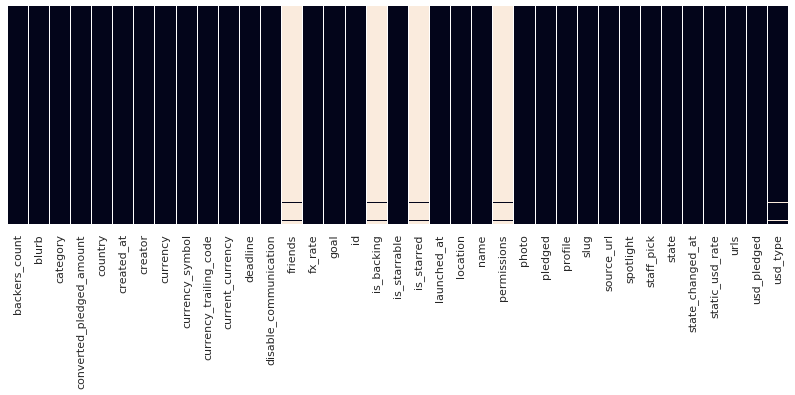

In [7]:
#exploring missing values --> few coloumns where close to all values are missing. 
plt.figure(figsize=(14,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

In [8]:
mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('isnull values per coloumn (if there are any)')
print(null_values)

isnull values per coloumn (if there are any)
permissions    208922
is_starred     208922
is_backing     208922
friends        208922
usd_type          480
location          226
blurb               8
dtype: int64


In [9]:
df.describe().round(2)

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.00,209222.00,2.092220e+05,2.092220e+05,209222.00,2.092220e+05,2.092220e+05,2.092220e+05,209222.00,2.092220e+05,209222.00,209222.00
mean,145.42,12892.90,1.456089e+09,1.463033e+09,0.99,4.917604e+04,1.073222e+09,1.460206e+09,18814.03,1.462838e+09,1.01,12892.13
std,885.97,88894.14,6.339711e+07,6.305618e+07,0.21,1.179427e+06,6.198051e+08,6.309029e+07,322959.62,6.290421e+07,0.23,88901.24
min,0.00,0.00,1.240366e+09,1.241334e+09,0.01,1.000000e-02,8.624000e+03,1.240603e+09,0.00,1.241334e+09,0.01,0.00
25%,4.00,106.00,1.413317e+09,1.420607e+09,1.00,1.500000e+03,5.351054e+08,1.417639e+09,110.00,1.420485e+09,1.00,106.00
50%,27.00,1537.00,1.457895e+09,1.464754e+09,1.00,5.000000e+03,1.074579e+09,1.461924e+09,1556.00,1.464709e+09,1.00,1537.36
75%,89.00,6548.00,1.511595e+09,1.519437e+09,1.00,1.500000e+04,1.609369e+09,1.516694e+09,6887.20,1.519366e+09,1.00,6550.00
max,105857.00,8596474.00,1.552527e+09,1.557721e+09,1.88,1.000000e+08,2.147476e+09,1.552537e+09,81030744.00,1.552537e+09,1.72,8596474.58


In [10]:
print('number of observations: ', df.shape[0])
print(f'number of unique IDs:', df.id.nunique())
print('duplicates in ID colm: ', df.shape[0]- df.id.nunique())

number of observations:  209222
number of unique IDs: 182264
duplicates in ID colm:  26958


In [11]:
print('Unique Values per Column:')
df.nunique().sort_values()

Unique Values per Column:


permissions                      1
is_backing                       1
friends                          1
is_starrable                     2
staff_pick                       2
spotlight                        2
is_starred                       2
disable_communication            2
currency_trailing_code           2
usd_type                         2
current_currency                 5
state                            5
currency_symbol                  6
currency                        14
country                         22
fx_rate                         67
category                       169
source_url                     169
backers_count                 3246
goal                          5110
static_usd_rate              11195
location                     15235
converted_pledged_amount     31387
pledged                      44387
usd_pledged                  79235
deadline                    170854
state_changed_at            172048
blurb                       180700
name                

In [12]:
print('different states campaigns have: ', df.state.unique())

different states campaigns have:  ['failed' 'canceled' 'live' 'successful' 'suspended']


## 4.3 Observations
- **non-intutive colm names** e.g., `blurb`, `fx_rate`, `friend`, `permission`, `slug` --> further explaination
- **insignificant number of entries** in `friend`, `is_starre`, `is_backing` --> possibily dropping these features
- most features contain no missing values, no specific handling of missing values required
- **few missing values in usd_type, location and blurb** --> possibly dropping these observation
- various **duplicate IDs** --> might be caused by change of state 
- **state** contains additional states beyond `Successful` / `Unsuccessful` --> dropping? 
  

In [13]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

# 5. Data Cleaning
Fix the inconsistencies within the data and handle the missing values

## 5.1 Dropping Non-Usefull Columns

In [14]:
lst = []

lst.append('location') #--> Detailed Location of the project. We have 'Country of origin'. MAYBE USEFULL.
lst.append('blurb') #--> short description of the offered product/service written for promotional purposes. MAYBE USEFULL.
lst.append('slug') #--> Creator-selected keyword id of the project. Not used here. MAYBE USEFULL.

lst.append('converted_pledged_amount') #--> redundant, a better version is usd_pledged
lst.append('created_at') #--> Date when Project was created (UNIX Format). Not used here.
lst.append('currency_symbol') #--> Symbol of the currency. Not used here.
lst.append('currency_trailing_code') #--> Defines whether the currency codes are always shown after the amounte locale. Not used here.
lst.append('current_currency') #--> Unknown (!) current currency. Not important, because we only look after converted USD.
lst.append('disable_communication') #--> True when the campaign is suspend (?) Not used here.
lst.append('friends') #--> Many NaN and a few empty lists. Not used here.
lst.append('fx_rate') #--> Used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars. Can be dropped ('static_usd_rate'  always converts to dollars).
lst.append('is_backing') #--> Many empty entries and a few false-values. Not used here.
lst.append('is_starrable') #--> true/false-values. Unknown (!) Not used here.
lst.append('is_starred') #--> Many empty entries and a few false-values. Not used here.
lst.append('name') #--> Name of the project. Not used here.
lst.append('permissions') #--> Many NaN and a few empty lists. Not used here.
lst.append('photo') #--> Some information regarding the project-photos. contains non-callable link to image. Not used here.
lst.append('pledged') #--> Unconverted pledged amount as float. Not used here.
lst.append('spotlight') #--> True/false-values. A possible feature that allows every successfully funded Kickstarter project to tell its story from beginning to end.
lst.append('state_changed_at') #--> State-changed-date of the project (UNIX Format). Not used here.
lst.append('urls') #--> Link directly to the project on kickstarter. Not used here.
lst.append('usd_type') #--> domestic, international or NaN. Not important, because we only look after converted USD.
lst.append('source_url') #--> URL of the corresponding category/subcategory. Not used here.

print('features to drop: \n', lst)

#DECOMMEND FOR ACTUAL DROP 
df.drop(lst, axis=1, inplace=True)

features to drop: 
 ['location', 'blurb', 'slug', 'converted_pledged_amount', 'created_at', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'disable_communication', 'friends', 'fx_rate', 'is_backing', 'is_starrable', 'is_starred', 'name', 'permissions', 'photo', 'pledged', 'spotlight', 'state_changed_at', 'urls', 'usd_type', 'source_url']


## 5.2 Calc of 'usd_goal' ('goal' * 'static_usd_rate')

In [15]:
# Creation of a new Colm defined as Goal * Static USD Rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'], 2)
print('Example USD_goal Colm:')
df[['country','currency','goal','static_usd_rate','usd_goal']][42:44]

Example USD_goal Colm:


,country,currency,goal,static_usd_rate,usd_goal
42,MX,MXN,350000.0,0.055292,19352.28
43,IT,EUR,15000.0,1.087614,16314.21


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   backers_count    209222 non-null  int64  
 1   category         209222 non-null  object 
 2   country          209222 non-null  object 
 3   creator          209222 non-null  object 
 4   currency         209222 non-null  object 
 5   deadline         209222 non-null  int64  
 6   goal             209222 non-null  float64
 7   id               209222 non-null  int64  
 8   launched_at      209222 non-null  int64  
 9   profile          209222 non-null  object 
 10  staff_pick       209222 non-null  bool   
 11  state            209222 non-null  object 
 12  static_usd_rate  209222 non-null  float64
 13  usd_pledged      209222 non-null  float64
 14  usd_goal         209222 non-null  float64
dtypes: bool(1), float64(4), int64(4), object(6)
memory usage: 22.5+ MB


## 5.3 Creating 'project-id' from 'profile'

In [17]:
# Creating 'project_id' for checking duplicates

In [18]:
df['project_id'] = [int(df.profile[i].split(':')[2].split(',')[0]) for i in df.index]
df.project_id[42:44]

42    3052231
43    2205507
Name: project_id, dtype: int64

## 5.4 Creating Target-Column 'success' from 'state'

In [19]:
# Creation of a new Column `success` 
def success_recognition(row):
    """returns 0 for unsuccessful and 1 for successful projects"""
    if row['state'] == 'successful':
        return 1
    if row['state'] == 'live' and row['usd_pledged'] >= row['usd_goal']:
        return 1
    else:
        return 0

df['success'] = df.apply(success_recognition, axis=1)

In [20]:
print('state,usd_pledged, usd_goal and resulting success:')
df[['state','usd_pledged','usd_goal','success']][(df['state'] == 'live')|(df['state'] == 'failed')]

state,usd_pledged, usd_goal and resulting success:


,state,usd_pledged,usd_goal,success
0,failed,80.000000,12500.00,0
2,failed,13.000000,1000.00,0
4,live,16.000000,100000.00,0
6,failed,0.000000,222000.00,0
7,failed,427.000000,700.00,0
...,...,...,...,...
209210,failed,31.000000,5000.00,0
209216,failed,1287.000000,3000.00,0
209217,failed,1359.000000,2500.00,0
209219,failed,446.000000,1000.00,0


## 5.5 Visualization of 'state' Distribution
Graphical representation of the distribution of the different states

state
canceled        8624
failed         75199
live            7311
successful    117465
suspended        623
Name: id, dtype: int64


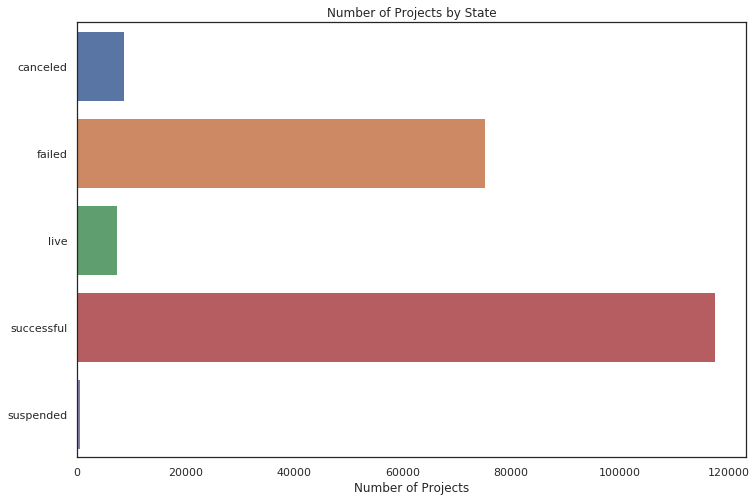

In [21]:
# How many Kickstarter projects are there? What about the distribution of types?
state_counts = df.groupby(by='state')['id'].count()
state_counts_labels = state_counts.index.values.tolist()
state_counts_sizes = state_counts.values.tolist()
print(state_counts)

f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = state_counts_sizes, y = state_counts_labels)
#sns.despine(trim=True)
ax.set_title("Number of Projects by State")
ax.set_xlabel("Number of Projects")
plt.savefig('figures/state_distribution_before.png', transparent=True)
plt.show()


## 5.6 Dropping rows: 'state' == 'cancled' or 'suspended' or 'live' (!=1)

In [22]:
## Dropping all rows with 'state'= 'cancled' or 'suspended' or ('live' and 'success' !=1)
print('df.shape: ',df.shape)

non_success1 = df[df['state'] == 'canceled'].index # length=8624
df.drop(non_success1 , inplace=True)
print('df.shape: ',df.shape)

non_success2 = df[df['state'] == 'suspended'].index # length=623
df.drop(non_success2 , inplace=True)
print('df.shape: ',df.shape)

non_success3 = df[(df['state'] == 'live')&(df['success'] == 0)].index # length=5377
df.drop(non_success3 , inplace=True)
print('df.shape: ',df.shape)

df.shape:  (209222, 17)
df.shape:  (200598, 17)
df.shape:  (199975, 17)
df.shape:  (194598, 17)


## 5.7 Visualization of new 'state' Distribution
Graphical representation of the new distribution of the different states (only Success or Failed)

success
0     75199
1    119399
Name: id, dtype: int64


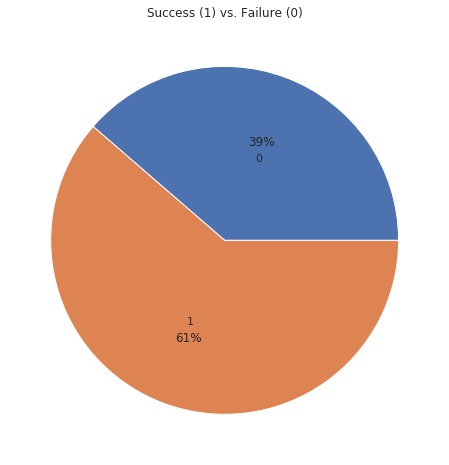

In [23]:
# Suitable here, because Live-Projects contains no success=0 at this time
new_state_counts = df.groupby(by='success')['id'].count()
new_state_counts_labels = new_state_counts.index.values.tolist()
new_state_counts_sizes = new_state_counts.values.tolist()
#new_state_counts
print(new_state_counts)

f, ax = plt.subplots(figsize=(8, 8))
plt.pie(new_state_counts_sizes, labels=new_state_counts_labels, autopct='%.0f%%', labeldistance=.5)
plt.title("Success (1) vs. Failure (0)")
plt.savefig('figures/state_distribution_after.png', transparent=True)
plt.show()

## 5.8 Extracting 'category' / 'sub_category' Features from string formated colms

In [24]:
#"category" --> main_category, keeping category intact
print('BEFORE extraction: \n', df.category[42:44])
df["main_category"] = [df.category[i].split('"')[9].split('/')[0].title() for i in df.index]
print('AFTER extraction: \n', df.main_category[42:44])

BEFORE extraction: 
 46    {"id":25,"name":"Sculpture","slug":"art/sculpt...
47    {"id":51,"name":"Software","slug":"technology/...
Name: category, dtype: object
AFTER extraction: 
 46           Art
47    Technology
Name: main_category, dtype: object


In [25]:
# category --> subcategory, keeping category intact
print('BEFORE extraction: \n', df.category[42:44])
df["sub_category"] = [df.category[i].split('"')[5] for i in df.index]
df["sub_category"] = df["sub_category"].str.replace("%20", "_")
print('AFTER extraction: \n', df.sub_category[42:44])

BEFORE extraction: 
 46    {"id":25,"name":"Sculpture","slug":"art/sculpt...
47    {"id":51,"name":"Software","slug":"technology/...
Name: category, dtype: object
AFTER extraction: 
 46    Sculpture
47     Software
Name: sub_category, dtype: object


In [26]:
# Creating a combined total_category
df["total_category"] = df["main_category"]+'//'+df["sub_category"]

In [27]:
print(f'''
Number of unique Main-Categories:    {df.main_category.nunique()}
Number of unique Sub-Categories:    {df.sub_category.nunique()}
Number of unique Total-Categories:  {df.total_category.nunique()}''')


Number of unique Main-Categories:    15
Number of unique Sub-Categories:    159
Number of unique Total-Categories:  169


In [28]:
df.groupby(["sub_category",'total_category']).count()
# sub_category 'Live Games' ansehen und prüfen!

,,backers_count,category,country,creator,currency,deadline,goal,id,launched_at,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal,project_id,success,main_category
sub_category,total_category,,,,,,,,,,,,,,,,,,
3D Printing,Technology//3D Printing,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762,762
Academic,Publishing//Academic,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958,958
Accessories,Fashion//Accessories,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435,3435
Action,Film & Video//Action,760,760,760,760,760,760,760,760,760,760,760,760,760,760,760,760,760,760
Animals,Photography//Animals,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodworking,Crafts//Woodworking,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571
Workshops,Dance//Workshops,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
World Music,Music//World Music,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192


## 5.9 Transforming Unix Date representations to DateTime

In [29]:
#colms to transform
# colms = ['created_at', 'deadline', 'launched_at', 'state_changed_at']
# 'created_at' und 'state_changed_at' gibt es zu diesem Zeitpunkt nicht mehr
colms = ['deadline', 'launched_at']

#documentation of data type before transformation
colms_dtype = {colm: df[colm].dtypes for colm in colms}
print(f'BEFORE transformation \n {colms_dtype}')

# converting: Unix --> DateTime 
for colm in colms:
    df[colm] = pd.to_datetime(df[colm], unit='s')

#documentation of data type transformation
colms_dtype = {colm: df[colm].dtypes for colm in colms}
print(f'AFTER transformation \n {colms_dtype}')

BEFORE transformation 
 {'deadline': dtype('int64'), 'launched_at': dtype('int64')}
AFTER transformation 
 {'deadline': dtype('<M8[ns]'), 'launched_at': dtype('<M8[ns]')}


## 5.10 Duration and Launch/Deadline 

In [30]:
# Launch Day/Month, Deadline Day/Month, Duration
df['duration_days'] = df['deadline'] - df['launched_at']
print('Duration:',df.duration_days[42]) 

df['launch_hour'] = df['launched_at'].dt.hour
print('Launch Hour:',df.launch_hour[42]) 

df['launch_day'] = df['launched_at'].dt.day_name()
print('Launch Day:',df.launch_day[42]) 

df['launch_month'] = df['launched_at'].dt.month_name()
print('Launch Month:',df.launch_month[42])

df['launch_year'] = df['launched_at'].dt.year
print('Launch Year:',df.launch_year[42])

df['deadline_hour'] = df['deadline'].dt.hour
print('Deadline Day:',df.deadline_hour[42]) 

df['deadline_day'] = df['deadline'].dt.day_name()
print('Deadline Day:',df.deadline_day[42]) 

df['deadline_month'] = df['deadline'].dt.month_name()
print('Deadline Month:',df.deadline_month[42]) 

df['deadline_year'] = df['deadline'].dt.year
print('Deadline Year:',df.deadline_year[42])

Duration: 30 days 00:00:00
Launch Hour: 5
Launch Day: Monday
Launch Month: July
Launch Year: 2017
Deadline Day: 5
Deadline Day: Wednesday
Deadline Month: August
Deadline Year: 2017


## 5.11 Calculation of Median Backing in each Sub Category as new feature

In [31]:
#calculating average pledge per backer for each observation
df['avg_pledge_per_backer_at_project'] = df.usd_pledged / df.backers_count # Hier entstehen auch NaN-Werte!
df['avg_pledge_per_backer_at_project'].head()

0    16.000000
2     6.500000
5    92.676471
6          NaN
7    53.375000
Name: avg_pledge_per_backer_at_project, dtype: float64

In [32]:
#median of the average pledge per backer in each sub_categobry
df['median_avg_pledge_per_backer_in_subcat'] = df['avg_pledge_per_backer_at_project'].groupby(df['total_category']).transform('median')
#df[['name','total_category', 'avg_pledge_per_backer_at_project', 'usd_pledged', 'backers_count', 'median_avg_pledge_per_backer_in_subcat']].head(3)
df[['total_category', 'avg_pledge_per_backer_at_project', 'usd_pledged', 'backers_count', 'median_avg_pledge_per_backer_in_subcat']].head(3)

,total_category,avg_pledge_per_backer_at_project,usd_pledged,backers_count,median_avg_pledge_per_backer_in_subcat
0,Food//Farms,16.000000,80.0,5,49.278571
2,Photography//Places,6.500000,13.0,2,32.957843
5,Journalism//Journalism,92.676471,3151.0,34,50.530134


## 5.12 Dropping Duplicates

In [33]:
# Checking for project duplicates
print(f'''In the {len(df)} projects in the dataset,
there are {len(df[df.duplicated(subset='project_id',keep='first')])} ones, which are listed more than once.''')

In the 194598 projects in the dataset,
there are 24562 ones, which are listed more than once.


In [34]:
print('Shape before dropping duplicates:', df.shape)
duplicates = df[df.duplicated(subset='project_id',keep='last')].index #length at full df=24562
df.drop(duplicates , inplace=True)
print('Shape after dropping duplicates: ', df.shape)

Shape before dropping duplicates: (194598, 31)
Shape after dropping duplicates:  (170036, 31)


## 5.13 Potential Analysis: ['usd_pledged'] == 0

In [35]:
print(df.shape)
print(df[df['usd_pledged'] == 0].shape)

(170036, 31)
(14821, 31)


## 5.14 NaN Values in `avg_pledge_per_backer_at_project`

In [36]:
mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('BEFORE NAN-Treatment,  isnull values:')
print(null_values)

df['avg_pledge_per_backer_at_project'] = df['avg_pledge_per_backer_at_project'].fillna(0)

mask = df.columns[df.isnull().any(axis=0)]
null_values = df[mask].isnull().sum()
null_values = null_values.sort_values(ascending=False)
print('AFTER NAN-Treatment, isnull values:')
print(null_values)

BEFORE NAN-Treatment,  isnull values:
avg_pledge_per_backer_at_project    14821
dtype: int64
AFTER NAN-Treatment, isnull values:
Series([], dtype: float64)


## 5.15 True/False --> 1/0

In [37]:
print(list(df.staff_pick[:15]))
df["staff_pick"] = df["staff_pick"].astype(int).astype('category')
print(list(df.staff_pick[:15]))

[False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


## 5.16 Categorical

In [38]:
df['staff_pick'] = df['staff_pick'].astype('category')
df['country'] = df['country'].astype('category')
df['currency'] = df['currency'].astype('category')
df['duration_days'] = df['duration_days'].astype('category')

df['launch_hour'] = df['launch_hour'].astype('category')
df['launch_day'] = df['launch_day'].astype('category')
df['launch_month'] = df['launch_month'].astype('category')
df['launch_year'] = df['launch_year'].astype('category')

df['deadline_hour'] = df['deadline_hour'].astype('category')
df['deadline_day'] = df['deadline_day'].astype('category')
df['deadline_month'] = df['deadline_month'].astype('category')
df['deadline_year'] = df['deadline_year'].astype('category')

## 5.17 Dropping remaining Non-Usefull Columns

In [39]:
lst = []
#lst.append('source_url') #--> useful information extracted
lst.append('goal') #--> goal in country currency, replaced by usd_goal
lst.append('static_usd_rate') #--> used for usd_goal
lst.append('state') #--> no longer needed. success is the new target
lst.append('category')
lst.append('creator')
lst.append('main_category')
lst.append('sub_category')
lst.append('deadline')
lst.append('id')
lst.append('launched_at') #--> needs to be decommented after success per year graph is fixed!
lst.append('profile')
lst.append('project_id')

print('features to drop: \n', lst)

#DECOMMEND FOR ACTUAL DROP 
df.drop(lst, axis=1, inplace=True)

print('REMAINING COLMS: ')
print(df.columns)

features to drop: 
 ['goal', 'static_usd_rate', 'state', 'category', 'creator', 'main_category', 'sub_category', 'deadline', 'id', 'launched_at', 'profile', 'project_id']
REMAINING COLMS: 
Index(['backers_count', 'country', 'currency', 'staff_pick', 'usd_pledged',
       'usd_goal', 'success', 'total_category', 'duration_days', 'launch_hour',
       'launch_day', 'launch_month', 'launch_year', 'deadline_hour',
       'deadline_day', 'deadline_month', 'deadline_year',
       'avg_pledge_per_backer_at_project',
       'median_avg_pledge_per_backer_in_subcat'],
      dtype='object')


## 5.18 Creating df_clean

In [40]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170036 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   backers_count                           170036 non-null  int64   
 1   country                                 170036 non-null  category
 2   currency                                170036 non-null  category
 3   staff_pick                              170036 non-null  category
 4   usd_pledged                             170036 non-null  float64 
 5   usd_goal                                170036 non-null  float64 
 6   success                                 170036 non-null  int64   
 7   total_category                          170036 non-null  object  
 8   duration_days                           170036 non-null  category
 9   launch_hour                             170036 non-null  category
 10  launch_day                      

# 6. Data Exploration
Form hypotheses about your defined problem by visually analyzing the data

## 6.1 Graph: Success per year

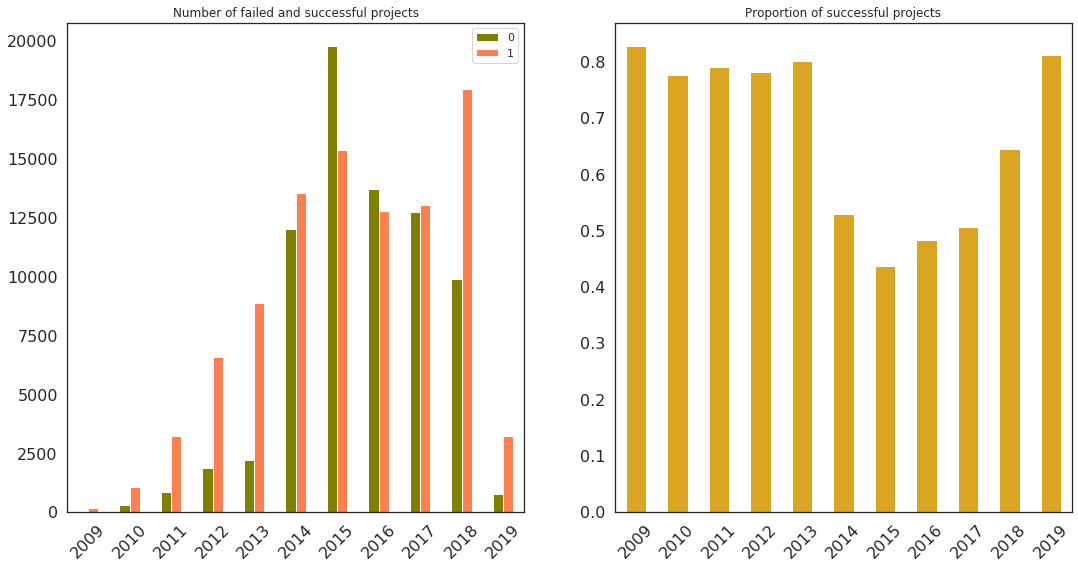

In [41]:
###### DATA SELECTION by defining a new table #######
success_by_year = df.set_index('launch_year').success
success_by_year = pd.get_dummies(success_by_year)#.resample('YS').sum()
success_by_year = success_by_year.groupby('launch_year').sum()
success_by_year

### SUBPLOT SETTINGS ###
fig, ax = plt.subplots(1,2, figsize=(18, 9))

### RIGHT Subplot ###
success_by_year.plot.bar(ax=ax[0], color=['olive', 'coral'])
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=16)
ax[0].set_xticklabels(list(range(2009,2020)), rotation=45)

### LEFT Subplot ###
success_by_year.div(success_by_year.sum(axis=1), axis=0)[1].plot(kind='bar', ax=ax[1], color='goldenrod') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=16)
ax[1].set_xticklabels(list(range(2009,2020)), rotation=45)

### CLEANING WORKSPACE ###
del success_by_year


### OUTPUT ###
plt.savefig('figures/success_per_year.png', transparent=True)
plt.show()

## 6.2 Graph: Count Total_Category

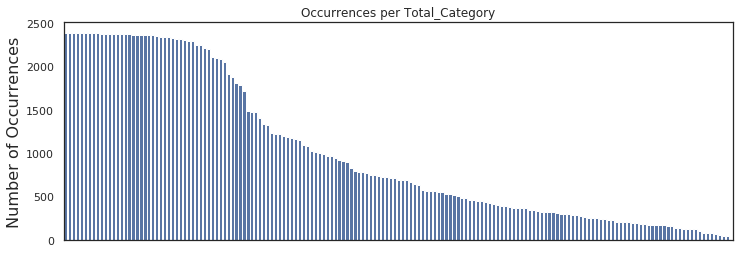

In [42]:
count_total_cat = df['total_category'].value_counts()

plt.figure()
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(count_total_cat.index, count_total_cat.values, color='b')
plt.title('Occurrences per Total_Category')
plt.ylabel('Number of Occurrences', fontsize=16)
ax.get_xaxis().set_ticks([])
plt.xlabel('')

### CLEANING WORKSPACE ###
del count_total_cat

###### OUTPUT #######
plt.savefig('figures/count_total_category.png', transparent=True)
plt.show();

## 6.3 Success by 'total_category' for most frequent sub categories
What is the successrate for the most frequent total_categories?

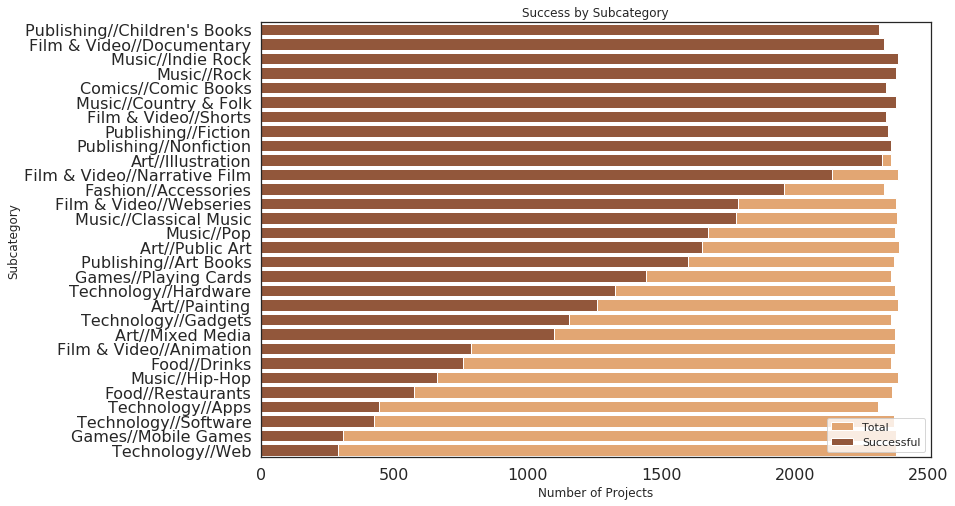

In [43]:
###### DATA SELECTION by defining a new table #######
success_by_subcategory = pd.pivot_table(df, index='total_category', columns='success', values='usd_pledged', aggfunc='count', fill_value = 0)
success_by_subcategory['total'] = success_by_subcategory[0] + success_by_subcategory[1] 
success_by_subcategory.columns = ['failed', 'successful', 'total']
success_by_subcategory['success_rate'] = success_by_subcategory['successful'] / success_by_subcategory['total']

#tweaking the data --> tweaking the plot. 
#sort_values(by=...) --> 'total' or successrate, or successrate AND Ascending=True
success_by_subcategory = success_by_subcategory.sort_values(by=['total'], ascending=False).reset_index()

#number of total_categories to illustrate
topcategories = success_by_subcategory.head(30)
#sorting topcategories by their success_rate
topcategories = topcategories.sort_values(by=['success_rate'], ascending=False).reset_index()


###### PLOT SETTINGS #######
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='total', y='total_category', data=topcategories, label='Total', color="sandybrown")
sns.barplot(x='successful', y='total_category', data=topcategories, label='Successful', color='sienna')

plt.tick_params(labelsize=16)
plt.title("Success by Subcategory")
plt.xlabel("Number of Projects")
plt.ylabel("Subcategory")
plt.legend()

### CLEANING WORKSPACE ###
#del success_by_subcategory, topcategories


###### OUTPUT #######
plt.savefig('figures/success_per_total_cat.png', transparent=True, bbox_inches='tight')
plt.show()

## 6.4 Backing in `total_category`

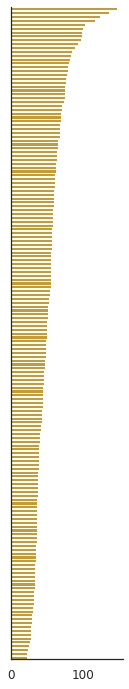

In [44]:
medians = df[['median_avg_pledge_per_backer_in_subcat', 'total_category']].groupby('total_category').mean().round(2)
medians = medians.sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection = medians
medians_selection


f, ax = plt.subplots(figsize=(2, 12))
sns.barplot(x=medians_selection.median_avg_pledge_per_backer_in_subcat, y=medians_selection.index, color='goldenrod')
ax.set_title("")
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.tick_params(labelsize=12)
plt.savefig('figures/overview_medians.png', transparent=True, bbox_inches='tight')
plt.show()

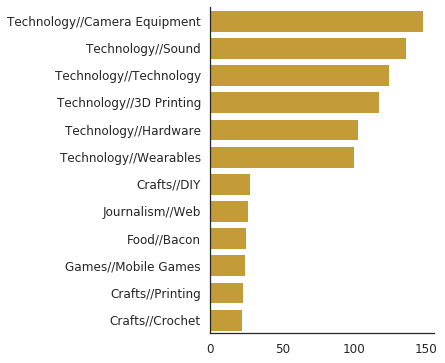

In [45]:
medians = df[['median_avg_pledge_per_backer_in_subcat', 'total_category']].groupby('total_category').mean().round(2)
medians = medians.sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection = pd.concat([medians.tail(6),medians.head(6)]).sort_values(by='median_avg_pledge_per_backer_in_subcat', ascending=False)
medians_selection


f, ax = plt.subplots(figsize=(4, 6))
sns.barplot(x=medians_selection.median_avg_pledge_per_backer_in_subcat, y=medians_selection.index, color='goldenrod')
ax.set_title("")
sns.despine()
plt.ylabel('')
plt.xlabel('')
plt.tick_params(labelsize=12)
plt.savefig('figures/median_avg_pledge_per_backer_in_subcat.png', transparent=True, bbox_inches='tight')
plt.show()

## 6.5 Success Rates for Number of Backers
How many backers are needed to good chance of Success?

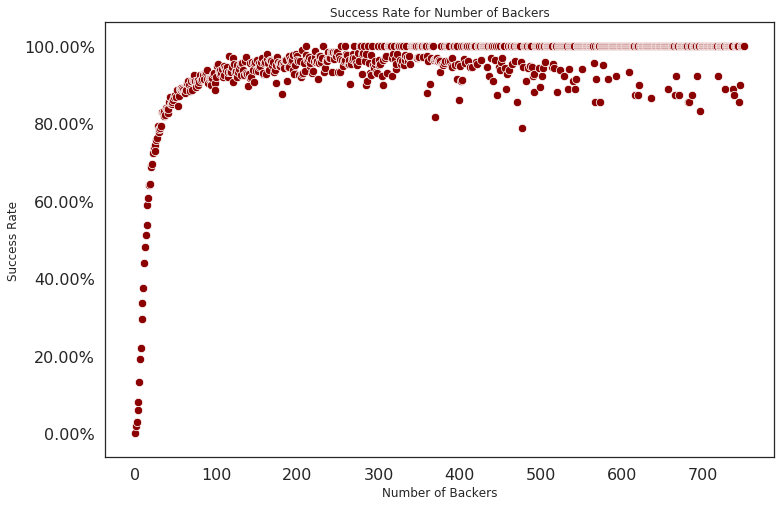

In [46]:
# Creating a dataframe with index = number-of-backers and columss fail-count, success-count and success-rate
num_of_backers = df.groupby(['backers_count','success']).count()
num_of_backers = num_of_backers['usd_pledged'].unstack()
num_of_backers = num_of_backers.fillna(0)
num_of_backers['success_rate'] = num_of_backers[1] / (num_of_backers[0] + num_of_backers[1])
num_of_backers_plot = num_of_backers[0:751] # Begrenzung auf die ersten 750 Einträge von 3228
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data = num_of_backers_plot['success_rate'], color='darkred', s=70)
ax.set_title('Success Rate for Number of Backers')
ax.set_xlabel('Number of Backers')
ax.set_ylabel('Success Rate')
ax.tick_params(labelsize=16)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig('figures/success_rates_for_number_of_backers.png', transparent=True)
plt.show()

## 6.6 Success based on Staff Pick

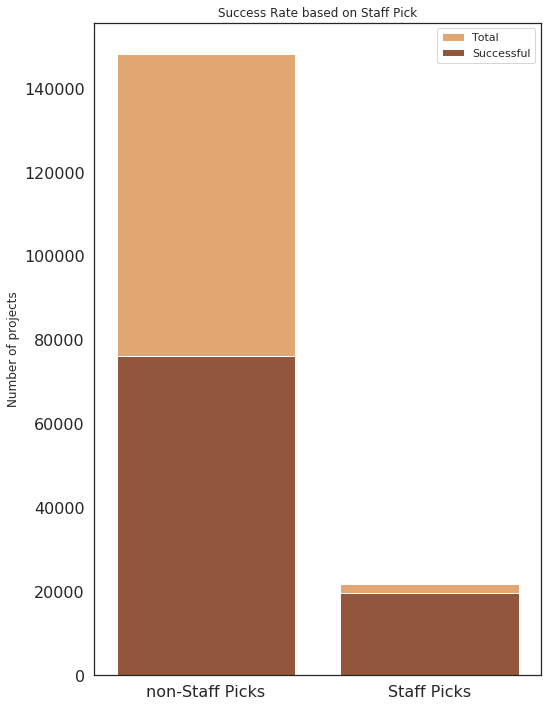

In [47]:
###### DATA SELECTION by defining a new table #######
success_staffpick = df.groupby(by=['staff_pick', 'success']).count()
success_staffpick = success_staffpick['usd_pledged'].unstack('success').fillna(0)
success_staffpick.columns = ['failed', 'successful']
success_staffpick['staff_pick'] = ['non-Staff Picks', 'Staff Picks']
success_staffpick['total'] = success_staffpick['successful'] + success_staffpick['failed'] 
#success_staffpick['success_rate'] = bystaffpick['successful'] / (bystaffpick['successful'] + bystaffpick['failed'])

###### PLOT SETTINGS #######
f, ax = plt.subplots(figsize=(8, 12))

sns.barplot(x='staff_pick', y='total', data=success_staffpick, label='Total', color="sandybrown")
sns.barplot(x='staff_pick', y='successful', data=success_staffpick, label='Successful', color='sienna')

plt.tick_params(labelsize=16)
plt.title("Success Rate based on Staff Pick")
plt.xlabel("")
plt.ylabel("Number of projects")
plt.legend()

### CLEANING WORKSPACE ###
del success_staffpick

###### OUTPUT #######
plt.savefig('figures/success_per_staffpick.png', bbox_inches='tight', transparent=True)
plt.show()

## 6.7 Correlation Matrix

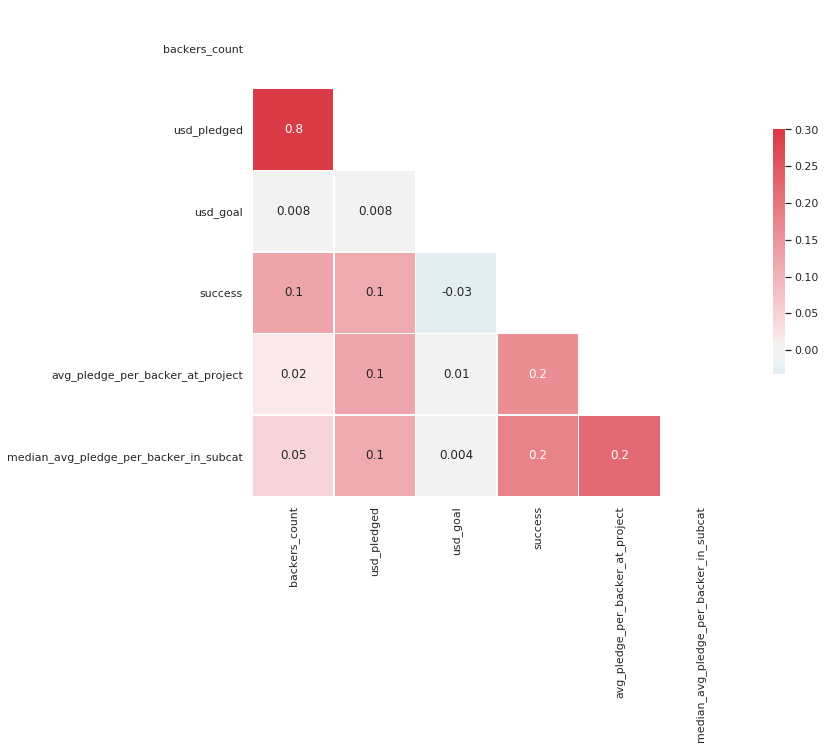

In [48]:
# Plot correlation heatmap for remaining continuous variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_clean.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");

## 6.8 Remaining Columns

In [49]:
print('REMAINING COLMS: ')
print(df.columns)

REMAINING COLMS: 
Index(['backers_count', 'country', 'currency', 'staff_pick', 'usd_pledged',
       'usd_goal', 'success', 'total_category', 'duration_days', 'launch_hour',
       'launch_day', 'launch_month', 'launch_year', 'deadline_hour',
       'deadline_day', 'deadline_month', 'deadline_year',
       'avg_pledge_per_backer_at_project',
       'median_avg_pledge_per_backer_in_subcat'],
      dtype='object')


# 7. Feature Engineering
Select important features and construct more meaningful ones using the raw data that you have

Annotation: Our addintinal features are:
- 'total_category' created in 5.8
- 'avg_pledge_per_backer_at_project' created in 5.11
- 'median_avg_pledge_per_backer_in_subcat' created in 6.4

# 8. Predictive Modeling
Train machine learning models (supervised learning), evaluate their performance and use them to make predictions

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170036 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   backers_count                           170036 non-null  int64   
 1   country                                 170036 non-null  category
 2   currency                                170036 non-null  category
 3   staff_pick                              170036 non-null  category
 4   usd_pledged                             170036 non-null  float64 
 5   usd_goal                                170036 non-null  float64 
 6   success                                 170036 non-null  int64   
 7   total_category                          170036 non-null  object  
 8   duration_days                           170036 non-null  category
 9   launch_hour                             170036 non-null  category
 10  launch_day                      

## 8.1 Downsampling

In [51]:
df_clean.shape

(170036, 19)

In [52]:
df_clean['success'].value_counts()

1    95836
0    74200
Name: success, dtype: int64

In [53]:
# Separate majority and minority classes
df_clean_majority = df_clean[df_clean.success==1]
df_clean_minority = df_clean[df_clean.success==0]

# Downsample majority class
df_clean_majority_downsampled = resample(df_clean_majority, 
                                         replace=False,      # sample without replacement
                                         n_samples=74200,    # to match minority class
                                         random_state=RSEED) # reproducible results

In [54]:
df_clean_majority['success'].value_counts()

1    95836
Name: success, dtype: int64

In [55]:
df_clean_majority_downsampled['success'].value_counts()

1    74200
Name: success, dtype: int64

In [56]:
# Combine minority class with downsampled majority class
df_model = pd.concat([df_clean_majority_downsampled, df_clean_minority])
 
# Display new class counts
df_model['success'].value_counts()

1    74200
0    74200
Name: success, dtype: int64

## 8.2 Deleting DataLeakage Candidates

In [57]:
df_model.shape

(148400, 19)

In [58]:
df_model.drop('backers_count', axis=1, inplace=True) #--> a) most likely not known by client and b) high risk of data leakage
df_model.drop('usd_pledged', axis=1, inplace=True) #--> high risk of data leakage since usd_pledget < usd_goal = failed 
df_model.shape

(148400, 17)

## 8.3 Saving downsampled 'df_model' to Pickle

In [59]:
savepath = 'df_model.pkl'
df_model.to_pickle(savepath)